In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

/Users/shinkeika/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shinkeika/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shinkeika/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# Loadding the data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [26]:
# plt.imshow(train_set_x_orig[22])
# classes
train_set_y[:,22]
classes.shape

(2,)

In [27]:
index = 22
print('y = ' + str(train_set_y[:,index]) + ' this is a ' + classes[np.squeeze(train_set_y[:,index])].decode('utf-8') + ' picture')

y = [0] this is a non-cat picture


In [29]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [34]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print(train_set_x_flatten)
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

[[ 17 196  82 ... 143  22   8]
 [ 31 192  71 ... 155  24  28]
 [ 56 190  68 ... 165  23  53]
 ...
 [  0  82 138 ...  85   4   0]
 [  0  80 141 ... 107   5   0]
 [  0  81 142 ... 149   0   0]]
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [36]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [38]:
# sigmoid 
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [39]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [40]:
# initialize_with_zeros
def initialize_with_zeros(dim):
    w = np.zeros([dim, 1])
    b = 0
    return w, b

In [42]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [62]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -np.sum(np.dot(np.log(A),Y.T) + np.dot(np.log(1-A),(1-Y).T))/m
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A - Y)/m
    cost = np.squeeze(cost)
    grads = {'dw':dw,
             'db':db}
    return grads, cost

In [63]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [64]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print('cost after iterations %i : %f ' % (i, cost))
            
    
    params = {'w':w,'b':b}
    grads = {'dw':dw,'db':db}
    return params,grads,costs

In [65]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067654


In [72]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X) + b)
    for i in range(A.shape[1]):
        if A[0,i] < 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
            
    return Y_prediction

In [73]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [88]:
# model
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters['w']
    b = parameters['b']
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print('test accuracy : {} %'.format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    print('train accuracy : {} %'.format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [89]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

cost after iterations 0 : 0.693147 
cost after iterations 100 : 0.584508 
cost after iterations 200 : 0.466949 
cost after iterations 300 : 0.376007 
cost after iterations 400 : 0.331463 
cost after iterations 500 : 0.303273 
cost after iterations 600 : 0.279880 
cost after iterations 700 : 0.260042 
cost after iterations 800 : 0.242941 
cost after iterations 900 : 0.228004 
cost after iterations 1000 : 0.214820 
cost after iterations 1100 : 0.203078 
cost after iterations 1200 : 0.192544 
cost after iterations 1300 : 0.183033 
cost after iterations 1400 : 0.174399 
cost after iterations 1500 : 0.166521 
cost after iterations 1600 : 0.159305 
cost after iterations 1700 : 0.152667 
cost after iterations 1800 : 0.146542 
cost after iterations 1900 : 0.140872 
test accuracy : 70.0 %
train accuracy : 99.04306220095694 %


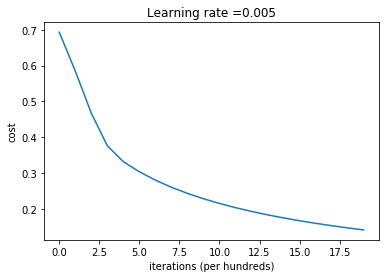

In [99]:
costs = np.squeeze(d['costs'])


plt.plot(costs)
plt.xlabel('iterations (per hundreds)')
plt.ylabel('cost')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
test accuracy : 68.0 %
train accuracy : 99.52153110047847 %

-------------------------------------------------------

learning rate is: 0.001
test accuracy : 64.0 %
train accuracy : 88.99521531100478 %

-------------------------------------------------------

learning rate is: 0.0001
test accuracy : 36.0 %
train accuracy : 68.42105263157895 %

-------------------------------------------------------



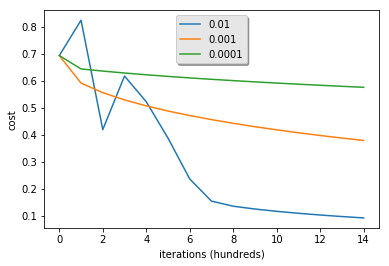

In [105]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()